In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import itertools

In [3]:
flatten = lambda l: itertools.chain(*l)
tokenize = lambda x:x.split()

filter_stopwords = lambda x:x not in stop_words

def normalize(text):
    text = " ".join(re.findall(u'[A-Za-ząćęłńóśźżĄĆĘŁŃÓŚŹŻ]+', text.decode('utf-8').lower()))
    return text.encode('utf-8')

In [4]:
df = pd.read_csv("./data/items.change.csv")

In [251]:
df.name = map(normalize, list(df.name))

In [252]:
stop_words = ["w", "a", "z", "do", "m", "i", "s", "w", "r", "za", "l", "na", 'quot', 'pod', 'tak', 'nie', 'o', 'od', 'the', "jak", "h", "x", 'dla', "lub", "się", "za", 'b', 'k', 'e', 'v', 'c', 'p', 'j', 'd']

In [253]:
splited_tags = map(lambda x:x.split(" » "), list(df.tag))
df["category"] =  map(lambda x:x[0], splited_tags)
df["subcategory"] =  map(lambda x:x[1], splited_tags)

In [254]:
from collections import Counter
top_tokens = {}
topics = list(set(df.category))
for topic in topics:
    topic_names = list(df[df.category==topic].name)
    tokens = list(flatten(map(tokenize, topic_names)))
    tokens = filter(filter_stopwords, tokens)
    counter = Counter(tokens)
    items = dict(sorted(counter.items(), key=lambda x:x[1], reverse=True)[:10])
    total_value = float(sum(items.values()))
    top_tokens[topic] = {key:item/total_value for key, item in items.items()}
    break

In [255]:
def get_tokens(text_list):
    tokens = map(tokenize, text_list)
    tokens = list(flatten(tokens))
    tokens = filter(filter_stopwords, tokens)
    return tokens

def get_tokens_freq(tokens):
    counter = Counter(tokens)
    return dict(sorted(counter.items(), key=lambda x:x[1], reverse=True))

def get_top(tokens_freq, top=10):
    return sorted(tokens_freq.items(), key=lambda x:x[1], reverse=True)[:top]

Akcesoria ślubne


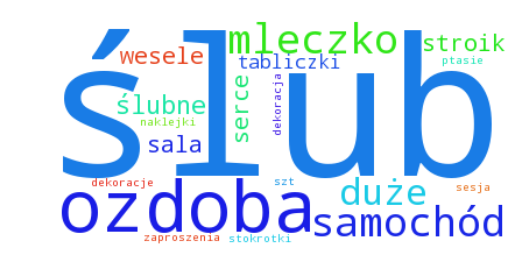

Akwarystyka


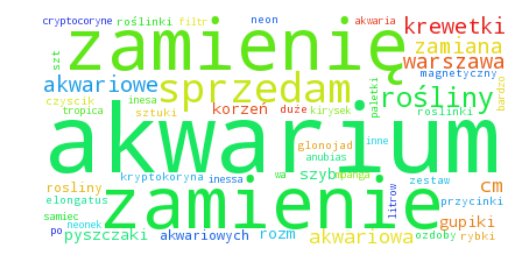

Biura i Lokale


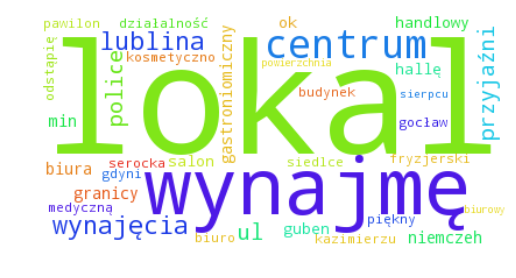

Części samochodowe


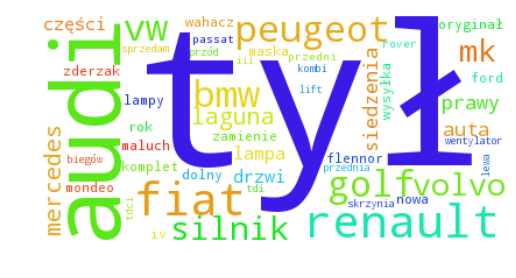

Dla Dzieci


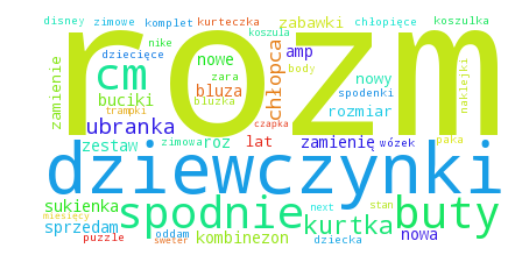

Dom i Ogród


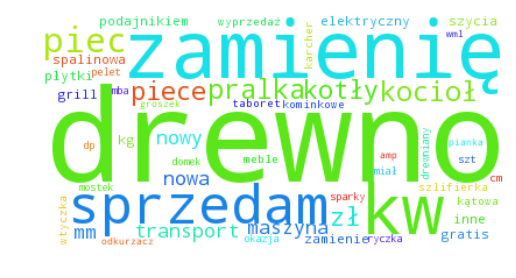

Domy


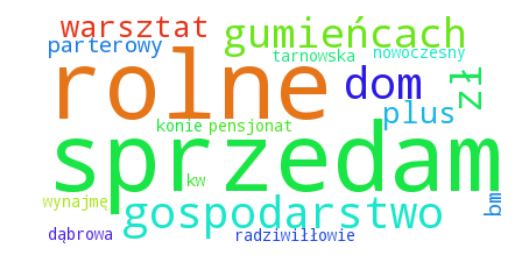

Dostawcze i Ciężarowe


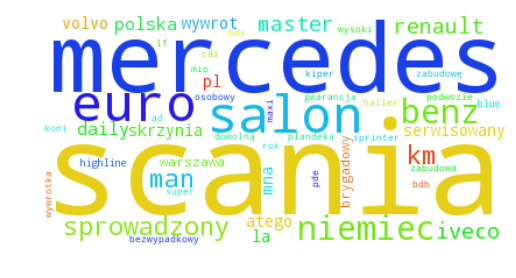

Działki


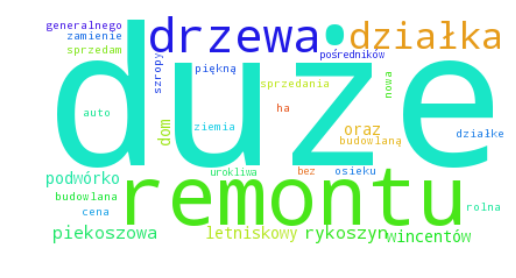

Elektronika


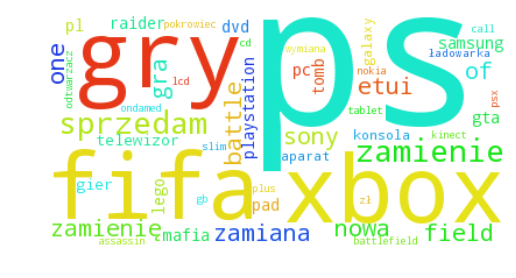

Garaże i Parkingi


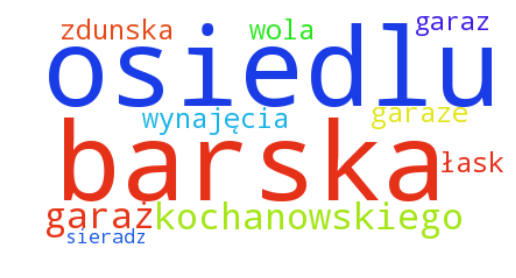

Gastronomia


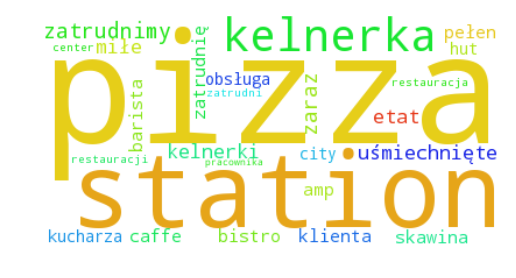

Giełda zwierząt


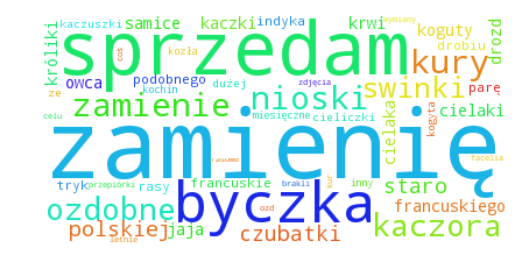

Hale i Magazyny


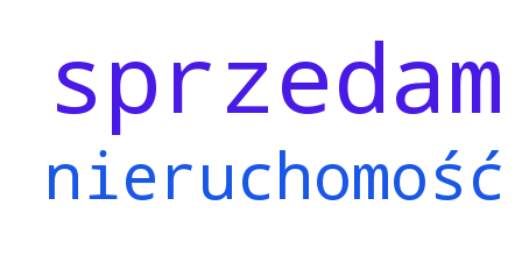

Komputery


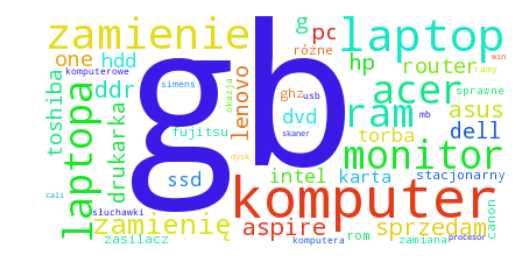

Korepetycje


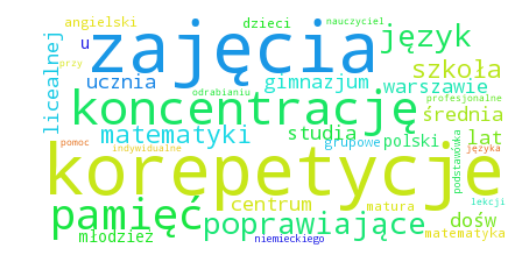

Koty


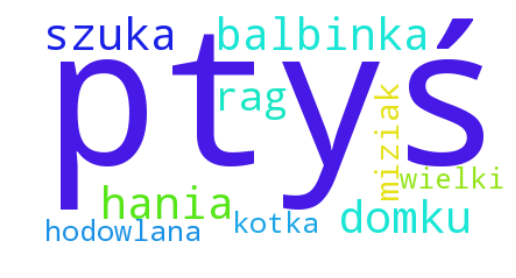

Książki


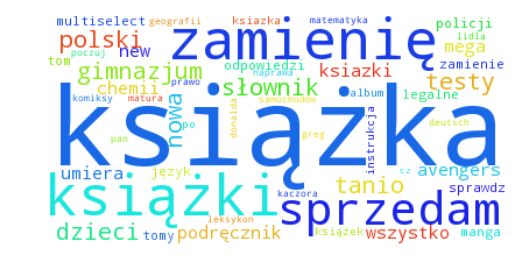

Kursy i Warsztaty


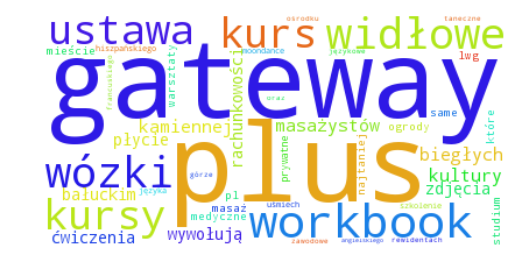

Maszyny rolnicze


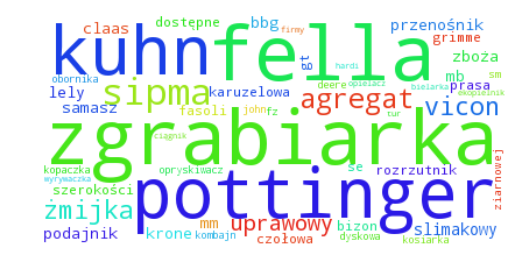

Meble


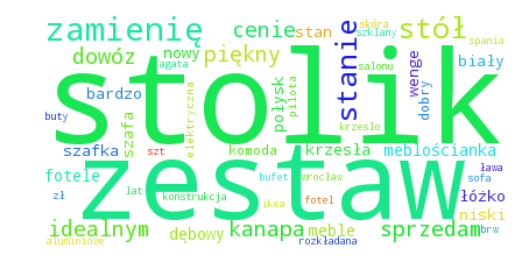

Mieszkania


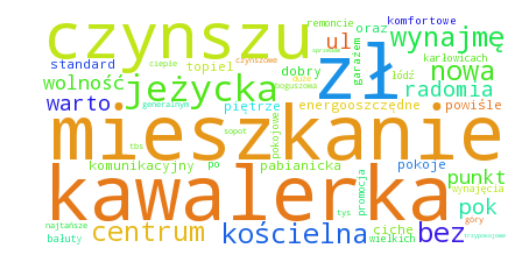

Moda


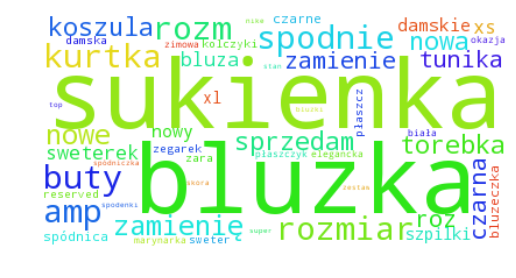

Moda ślubna


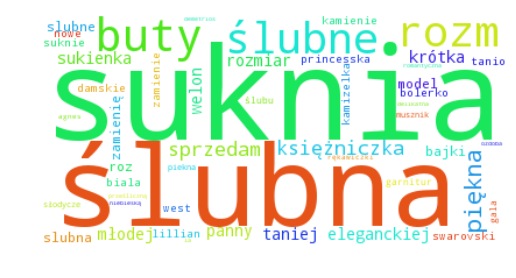

Motocykle i Skutery


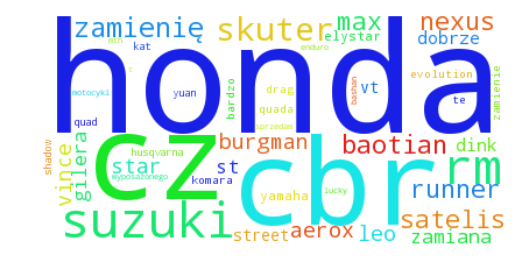

Motoryzacja


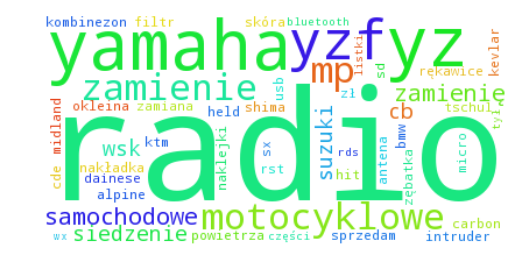

Muzyka i Edukacja


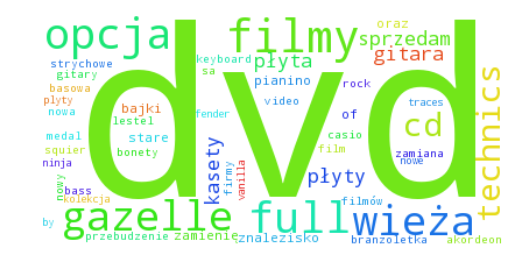

Nieruchomości


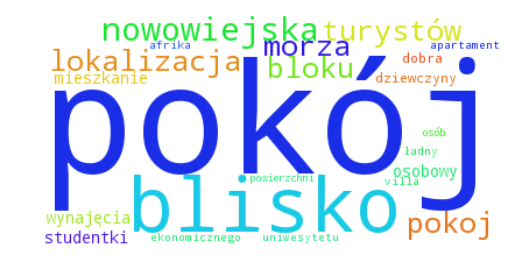

Opony i Felgi


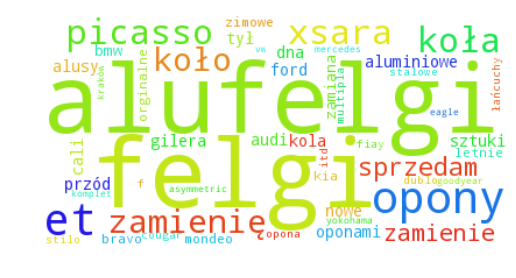

Pozostałe nieruchomości


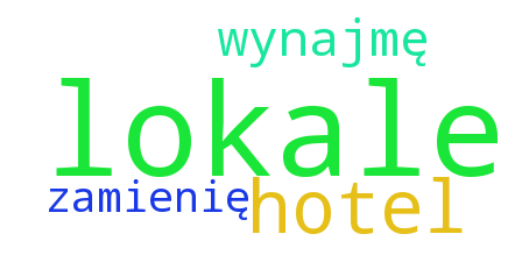

Praca


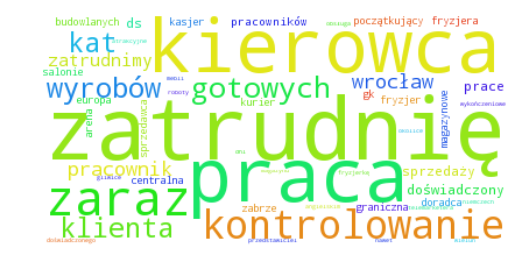

Przyczepy i Pojazdy użytkowe


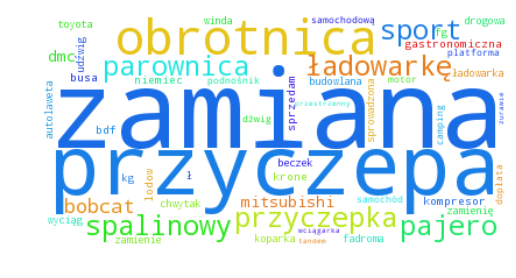

Psy


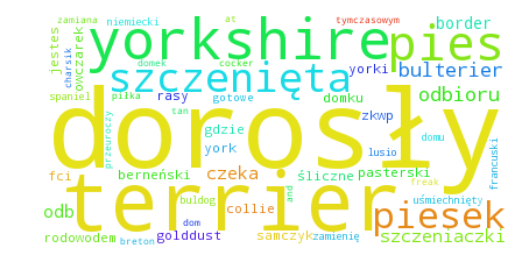

Rolnictwo


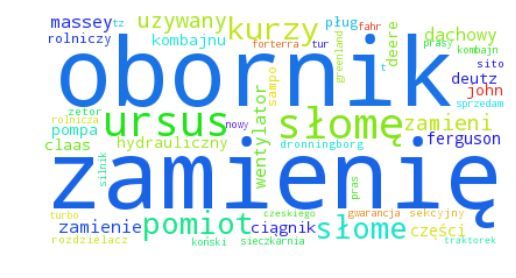

Samochody osobowe


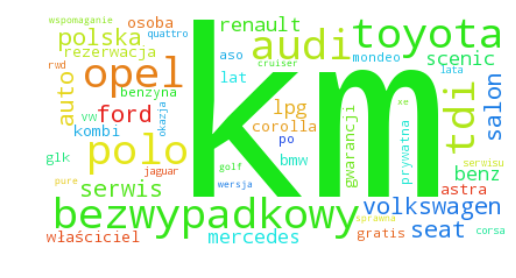

Sport i Hobby


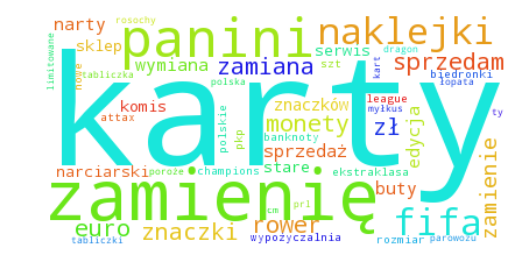

Telefony komórkowe


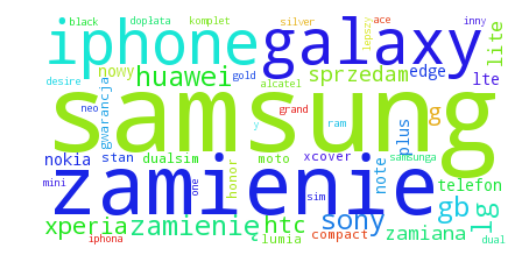

Usługi i Firmy


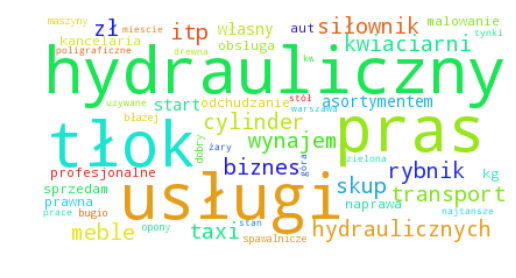

Usługi ślubne


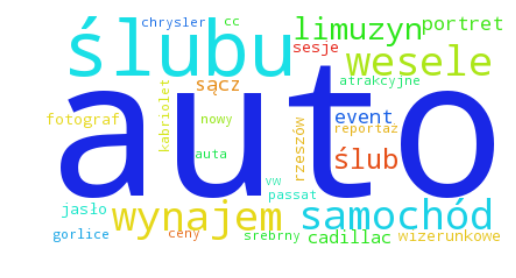

Wyposażenie wnętrz


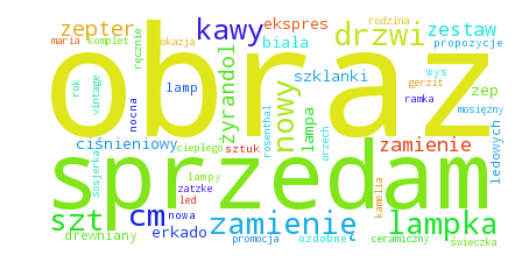

Zwierzęta


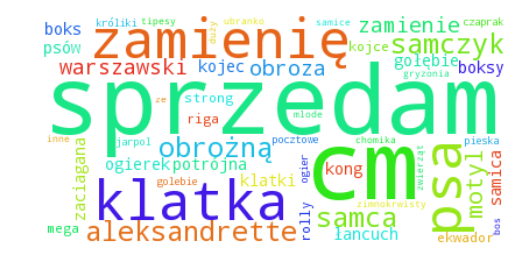

In [256]:
from wordcloud import WordCloud
for category, group in df.groupby("category"):
    print category
    print "="*20
    tokens = map(lambda x:x.decode('utf-8'), get_tokens(list(group.name)))
    tokens_freq = get_tokens_freq(tokens)
    total_freq = np.sum(tokens_freq.values())
    top_counts = get_top(tokens_freq,50)
    
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(top_counts)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
